In [ ]:
import os

print(os.getcwd())

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet


#path_pfx = "/Users/t866229/input/prophet/"
path_pfx = "../../input/prophet/"
path_sfx = "_5yr.csv"

def stockchart(tickernames):
    for f in tickernames:
        filename = path_pfx + f + path_sfx
        # Load the dataset using pandas
        data = pd.read_csv(filename) 
        # Select only the important features i.e. the date and price
        data = data[["Date","Close"]] # select Date and Price
        # Rename the features: These names are NEEDED for the model fitting
        data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
        #data.tail(5)
    
        m = Prophet(daily_seasonality = True) # the Prophet class (model)
        m.fit(data) # fit the model using all data
    
        future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
        prediction = m.predict(future)
        m.plot(prediction)
        plt.title(filename)
        plt.xlabel("Date")
        plt.ylabel("Close Stock Price")
        plt.show()

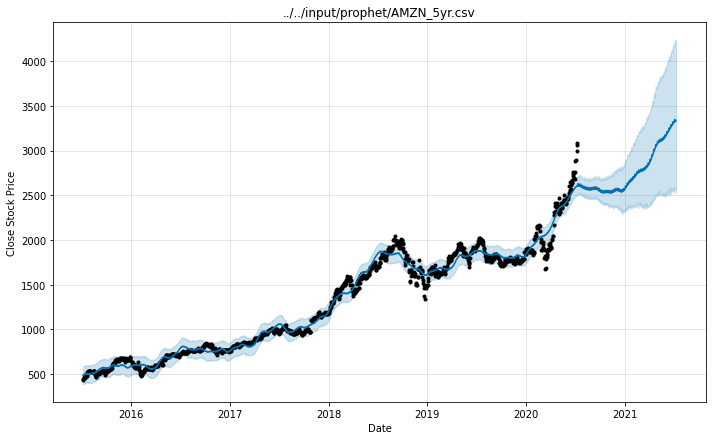

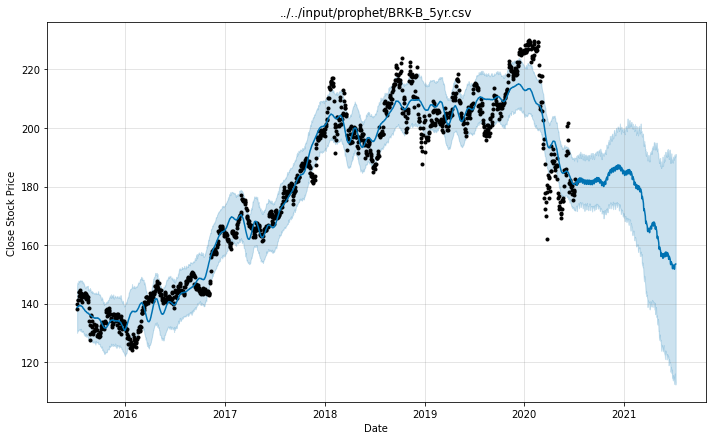

In [11]:
tickernames=['AMZN','BRK-B']
stockchart(tickernames)

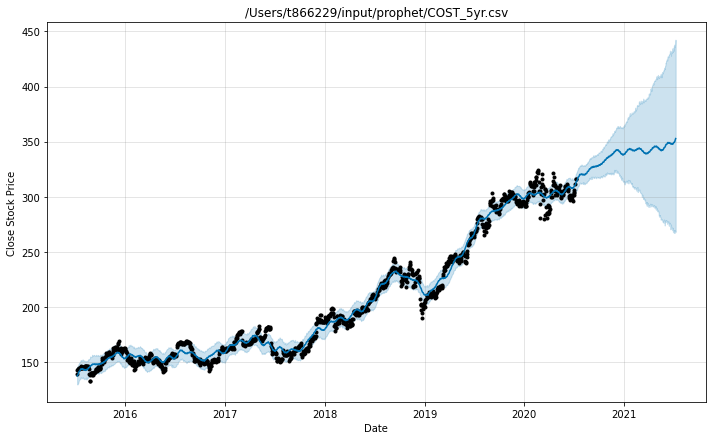

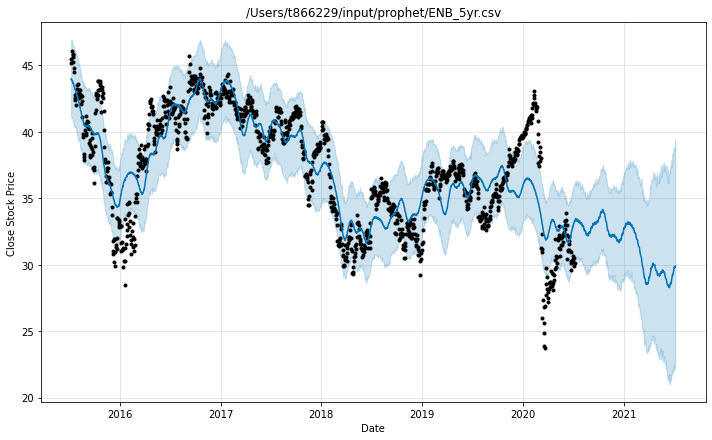

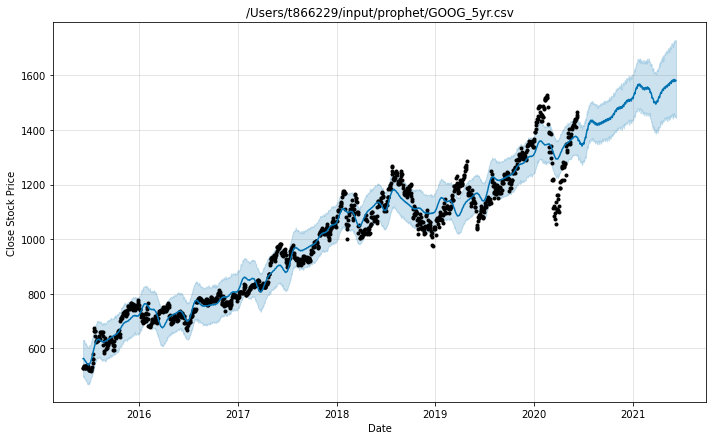

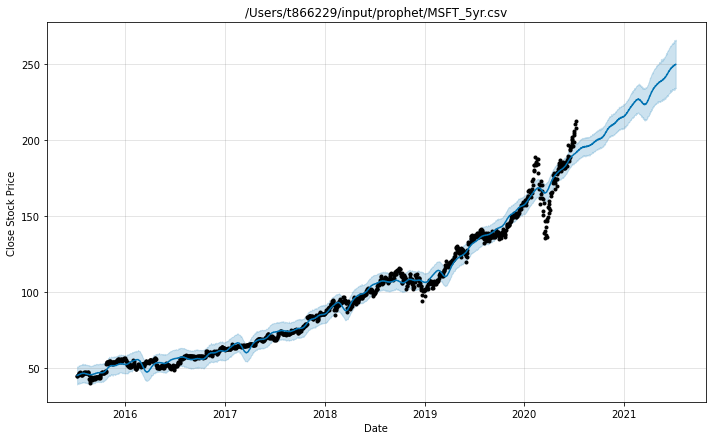

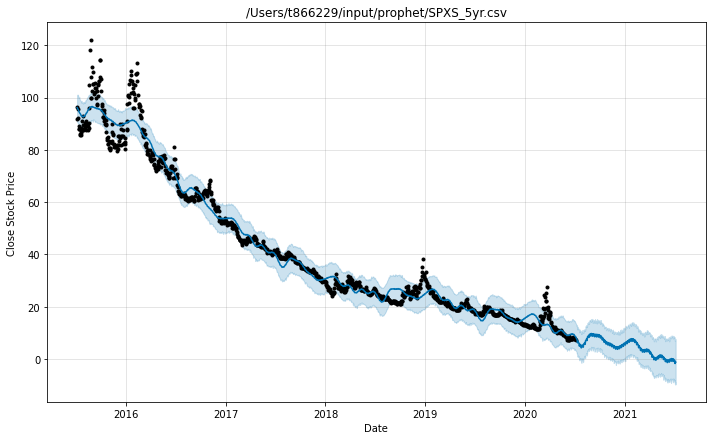

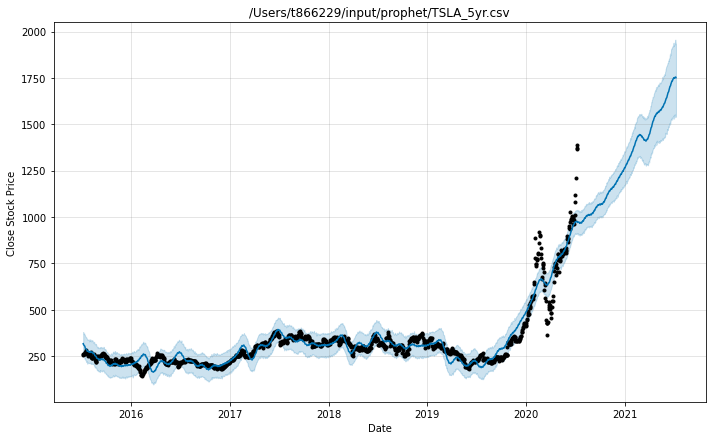

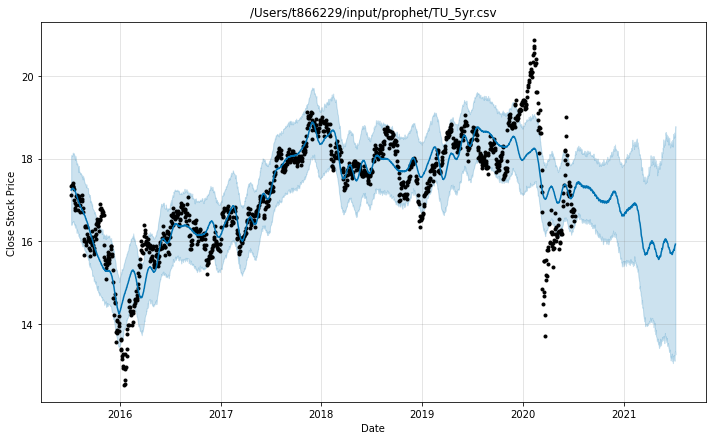

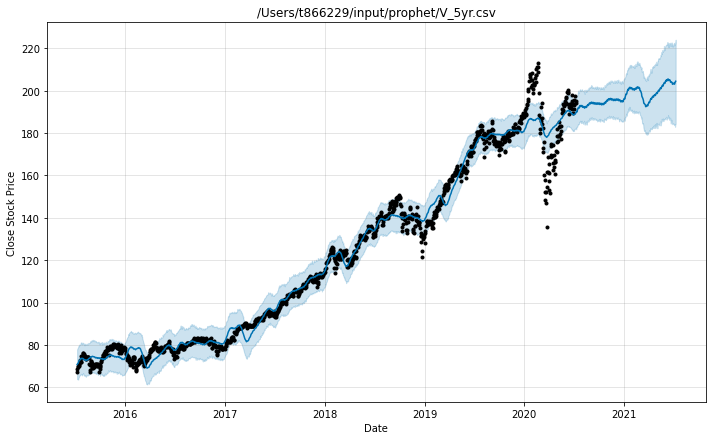

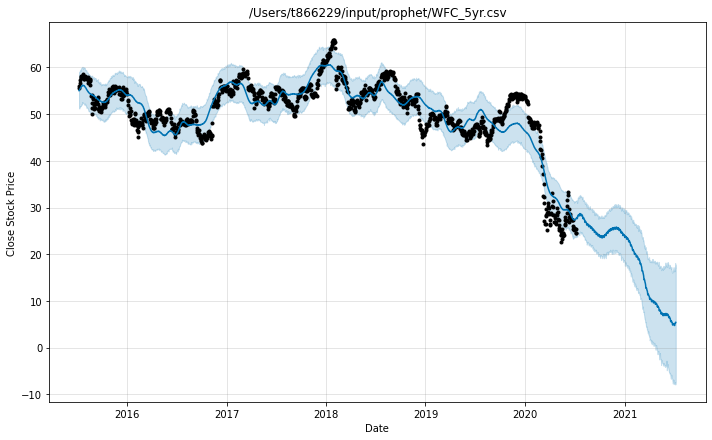

In [6]:
tickernames=['COST','ENB','GOOG','MSFT','SPXS','TSLA','TU','V','WFC']
stockchart(tickernames)

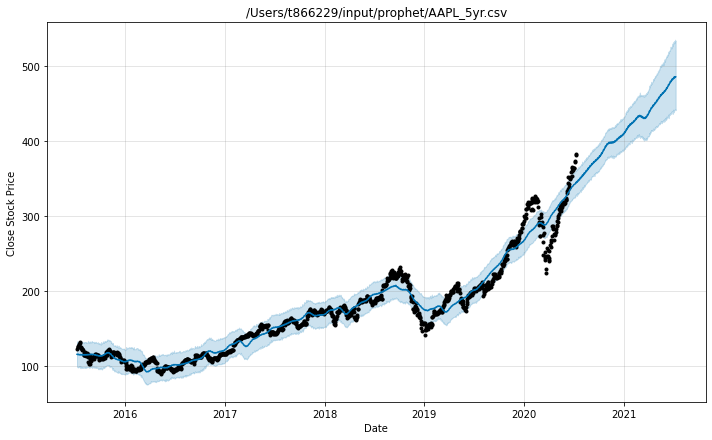

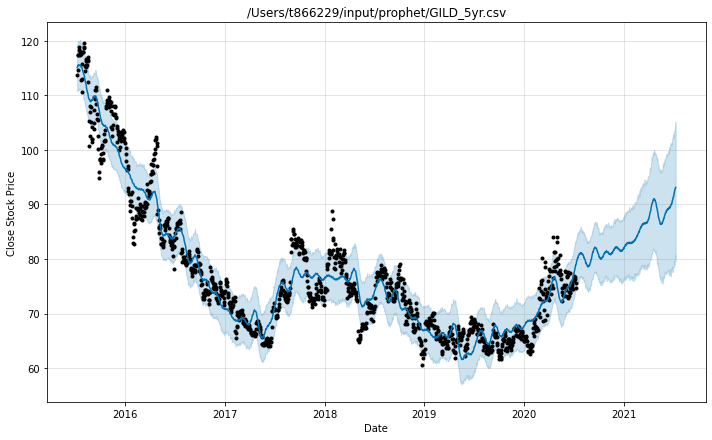

In [8]:
tickernames=['AAPL','GILD']
stockchart(tickernames)